# AIM:
### Build a model to accurately predict whether the patients in the dataset have diabetes or not.

# About Dataset:
### The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

# Variables Description:
* Pregnancies: Number of times pregnant.
* Glucose: Plasma glucose concentration in an oral glucose tolerance test.
* BloodPressure: Diastolic blood pressure (mm Hg).
* SkinThickness: Triceps skinfold thickness (mm).
* Insulin: Two hour serum insulin.
* BMI: Body Mass Index.
* DiabetesPedigreeFunction: Diabetes pedigree function.
* Age: Age in years.
* Outcome: Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0.

# Tasks carried out:
* Data Exploration and EDA.
* Data Splitting.
* Data Modelling: Data modelling using KNN classifier and comparing with different models and choosing the best model.
* loading the model using pickle.
* cross check the output of the model when inputs are provided.

# 1) DATA EXPLORATION AND EDA:

In [11]:
import pandas as pd
import numpy as np

In [87]:
data = pd.read_csv(r"C:\Users\sksho\Desktop\My Github Repo\Diabetes Dataset\Datasets\health care diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
data.shape

(768, 9)

In [14]:
data.info()  # there are no null values present in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### NOTE: We can observe that the features i.e., Glucose, BloodPressure, SkinThickness, Insulin & BMI
### has minmum value of zero which does 
### not make any sense for a human being.
### hence the above features with value '0' 
### can be treated as Null values (missing records)

In [16]:
#To change the values in these columns from zero to null values:
data.loc[data['Glucose']==0,'Glucose'] = np.nan
data.loc[data['BloodPressure']==0,'BloodPressure'] = np.nan
data.loc[data['SkinThickness']==0,'SkinThickness'] = np.nan
data.loc[data['Insulin']==0,'Insulin'] =np.nan
data.loc[data['BMI']==0,'BMI'] = np.nan
data.loc[data['DiabetesPedigreeFunction']==0,'DiabetesPedigreeFunction'] = np.nan

### NOTE: Changed all the values of zero's in 
### columns(Glucose, Blood Pressure, Skin Thickness, Insulin, BMI)
### to Null values.  

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [18]:
data.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:

import matplotlib.pyplot as plt
%matplotlib inline


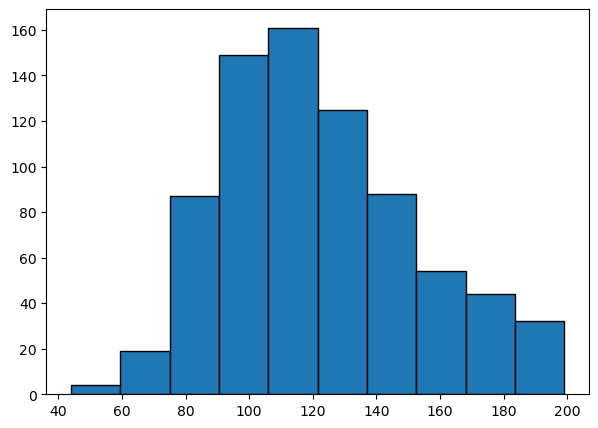

In [20]:
plt.figure(figsize=(7,5))
plt.hist(data['Glucose'], edgecolor ='k')
plt.show()

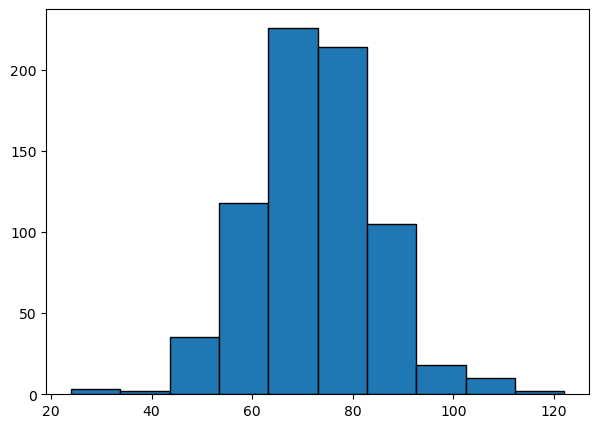

In [21]:
plt.figure(figsize=(7,5))
plt.hist(data['BloodPressure'], edgecolor ='k')
plt.show()

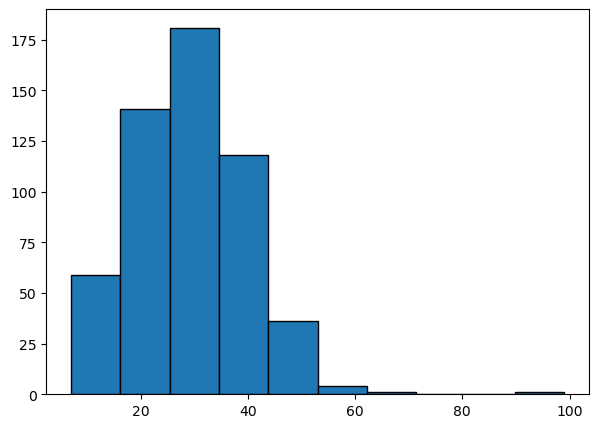

In [22]:
plt.figure(figsize=(7,5))
plt.hist(data['SkinThickness'], edgecolor ='k')
plt.show()

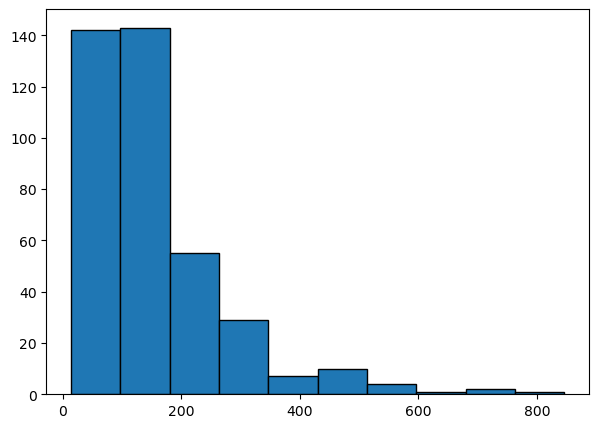

In [23]:
plt.figure(figsize=(7,5))
plt.hist(data['Insulin'], edgecolor ='k')
plt.show()

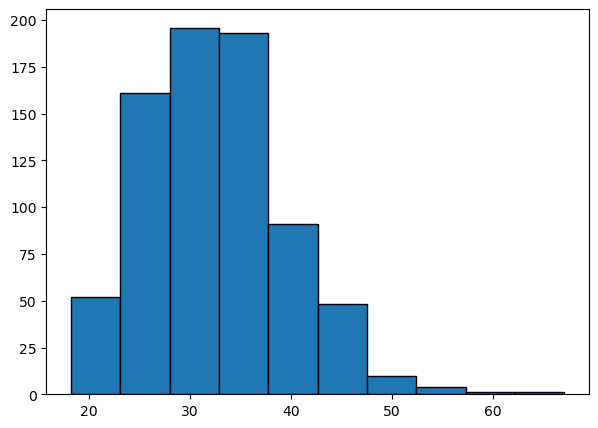

In [24]:
plt.figure(figsize=(7,5))
plt.hist(data['BMI'], edgecolor ='k')
plt.show()

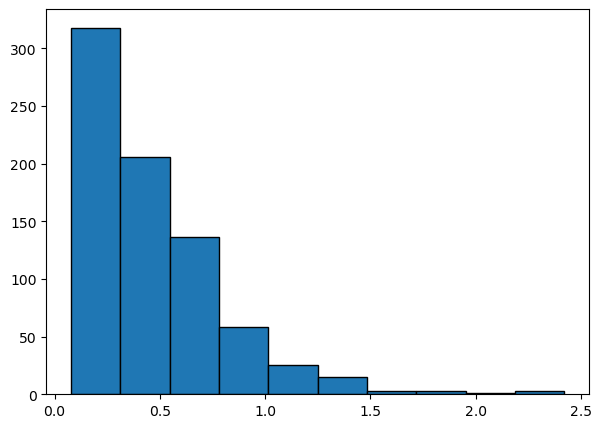

In [25]:
plt.figure(figsize=(7,5))
plt.hist(data['DiabetesPedigreeFunction'], edgecolor ='k')
plt.show()

In [26]:
#treating the missing values with the mean:
data['Glucose'].fillna(data['Glucose'].mean(), inplace =True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace =True)
data['SkinThickness'].fillna(data['SkinThickness'].mean(), inplace =True)
data['Insulin'].fillna(data['Insulin'].mean(), inplace =True)
data['BMI'].fillna(data['BMI'].mean(), inplace =True)


In [27]:
data.isnull().sum()
#hence all null values have been treated.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [29]:
# to see the count(frequency) plot:
count_dtypes = data.dtypes.value_counts()
count_dtypes_df = pd.DataFrame(count_dtypes)
count_dtypes_df.rename(columns = {0:'Counts'},inplace =True)
count_dtypes_df['Type_of_dtype']= count_dtypes_df.index
count_dtypes_df

,Counts,Type_of_dtype
float64,6,float64
int64,3,int64


<AxesSubplot:title={'center':'Frequency Distibution Of Data Types'}, xlabel='Type_of_dtype', ylabel='counts'>

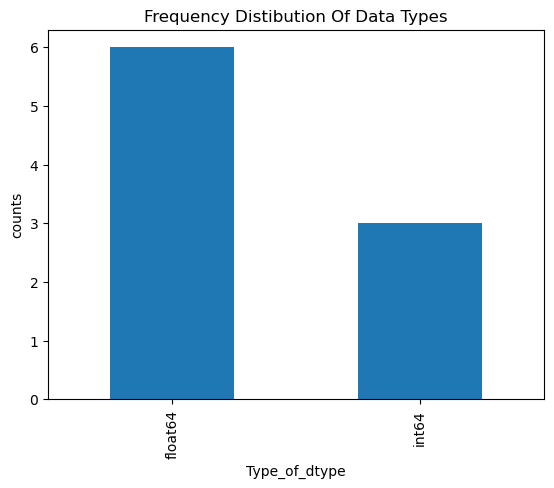

In [30]:
count_dtypes_df['Counts'].plot.bar(xlabel = 'Type_of_dtype', 
                                   ylabel = 'counts', 
                                   title = 'Frequency Distibution Of Data Types')

<AxesSubplot:xlabel='Outcomes', ylabel='Counts'>

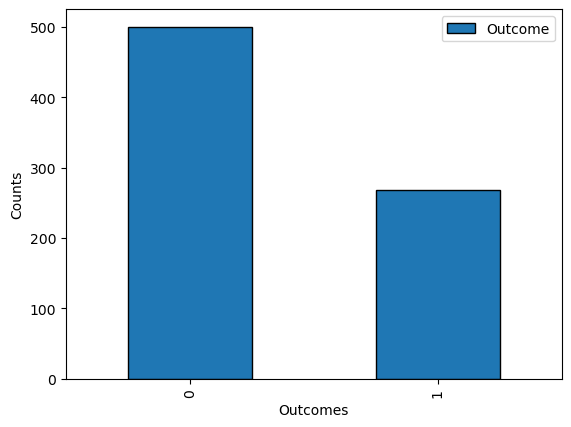

In [31]:
# To check the count of outcomes by their values:
outcome_counts = data['Outcome'].value_counts()
outcome_counts_df = pd.DataFrame(outcome_counts)
outcome_counts_df.plot.bar(xlabel= 'Outcomes',ylabel = 'Counts', edgecolor ='k')

In [32]:
print(data[data['Outcome']==1].shape)
print(data[data['Outcome']==0].shape)

(268, 9)
(500, 9)


### NOTE: From the above finding 268 people are diabetic and 500 people are non diabetic, also by loooking at the outcome count we can find that the data is imbalanced data.

In [33]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<Figure size 700x500 with 0 Axes>

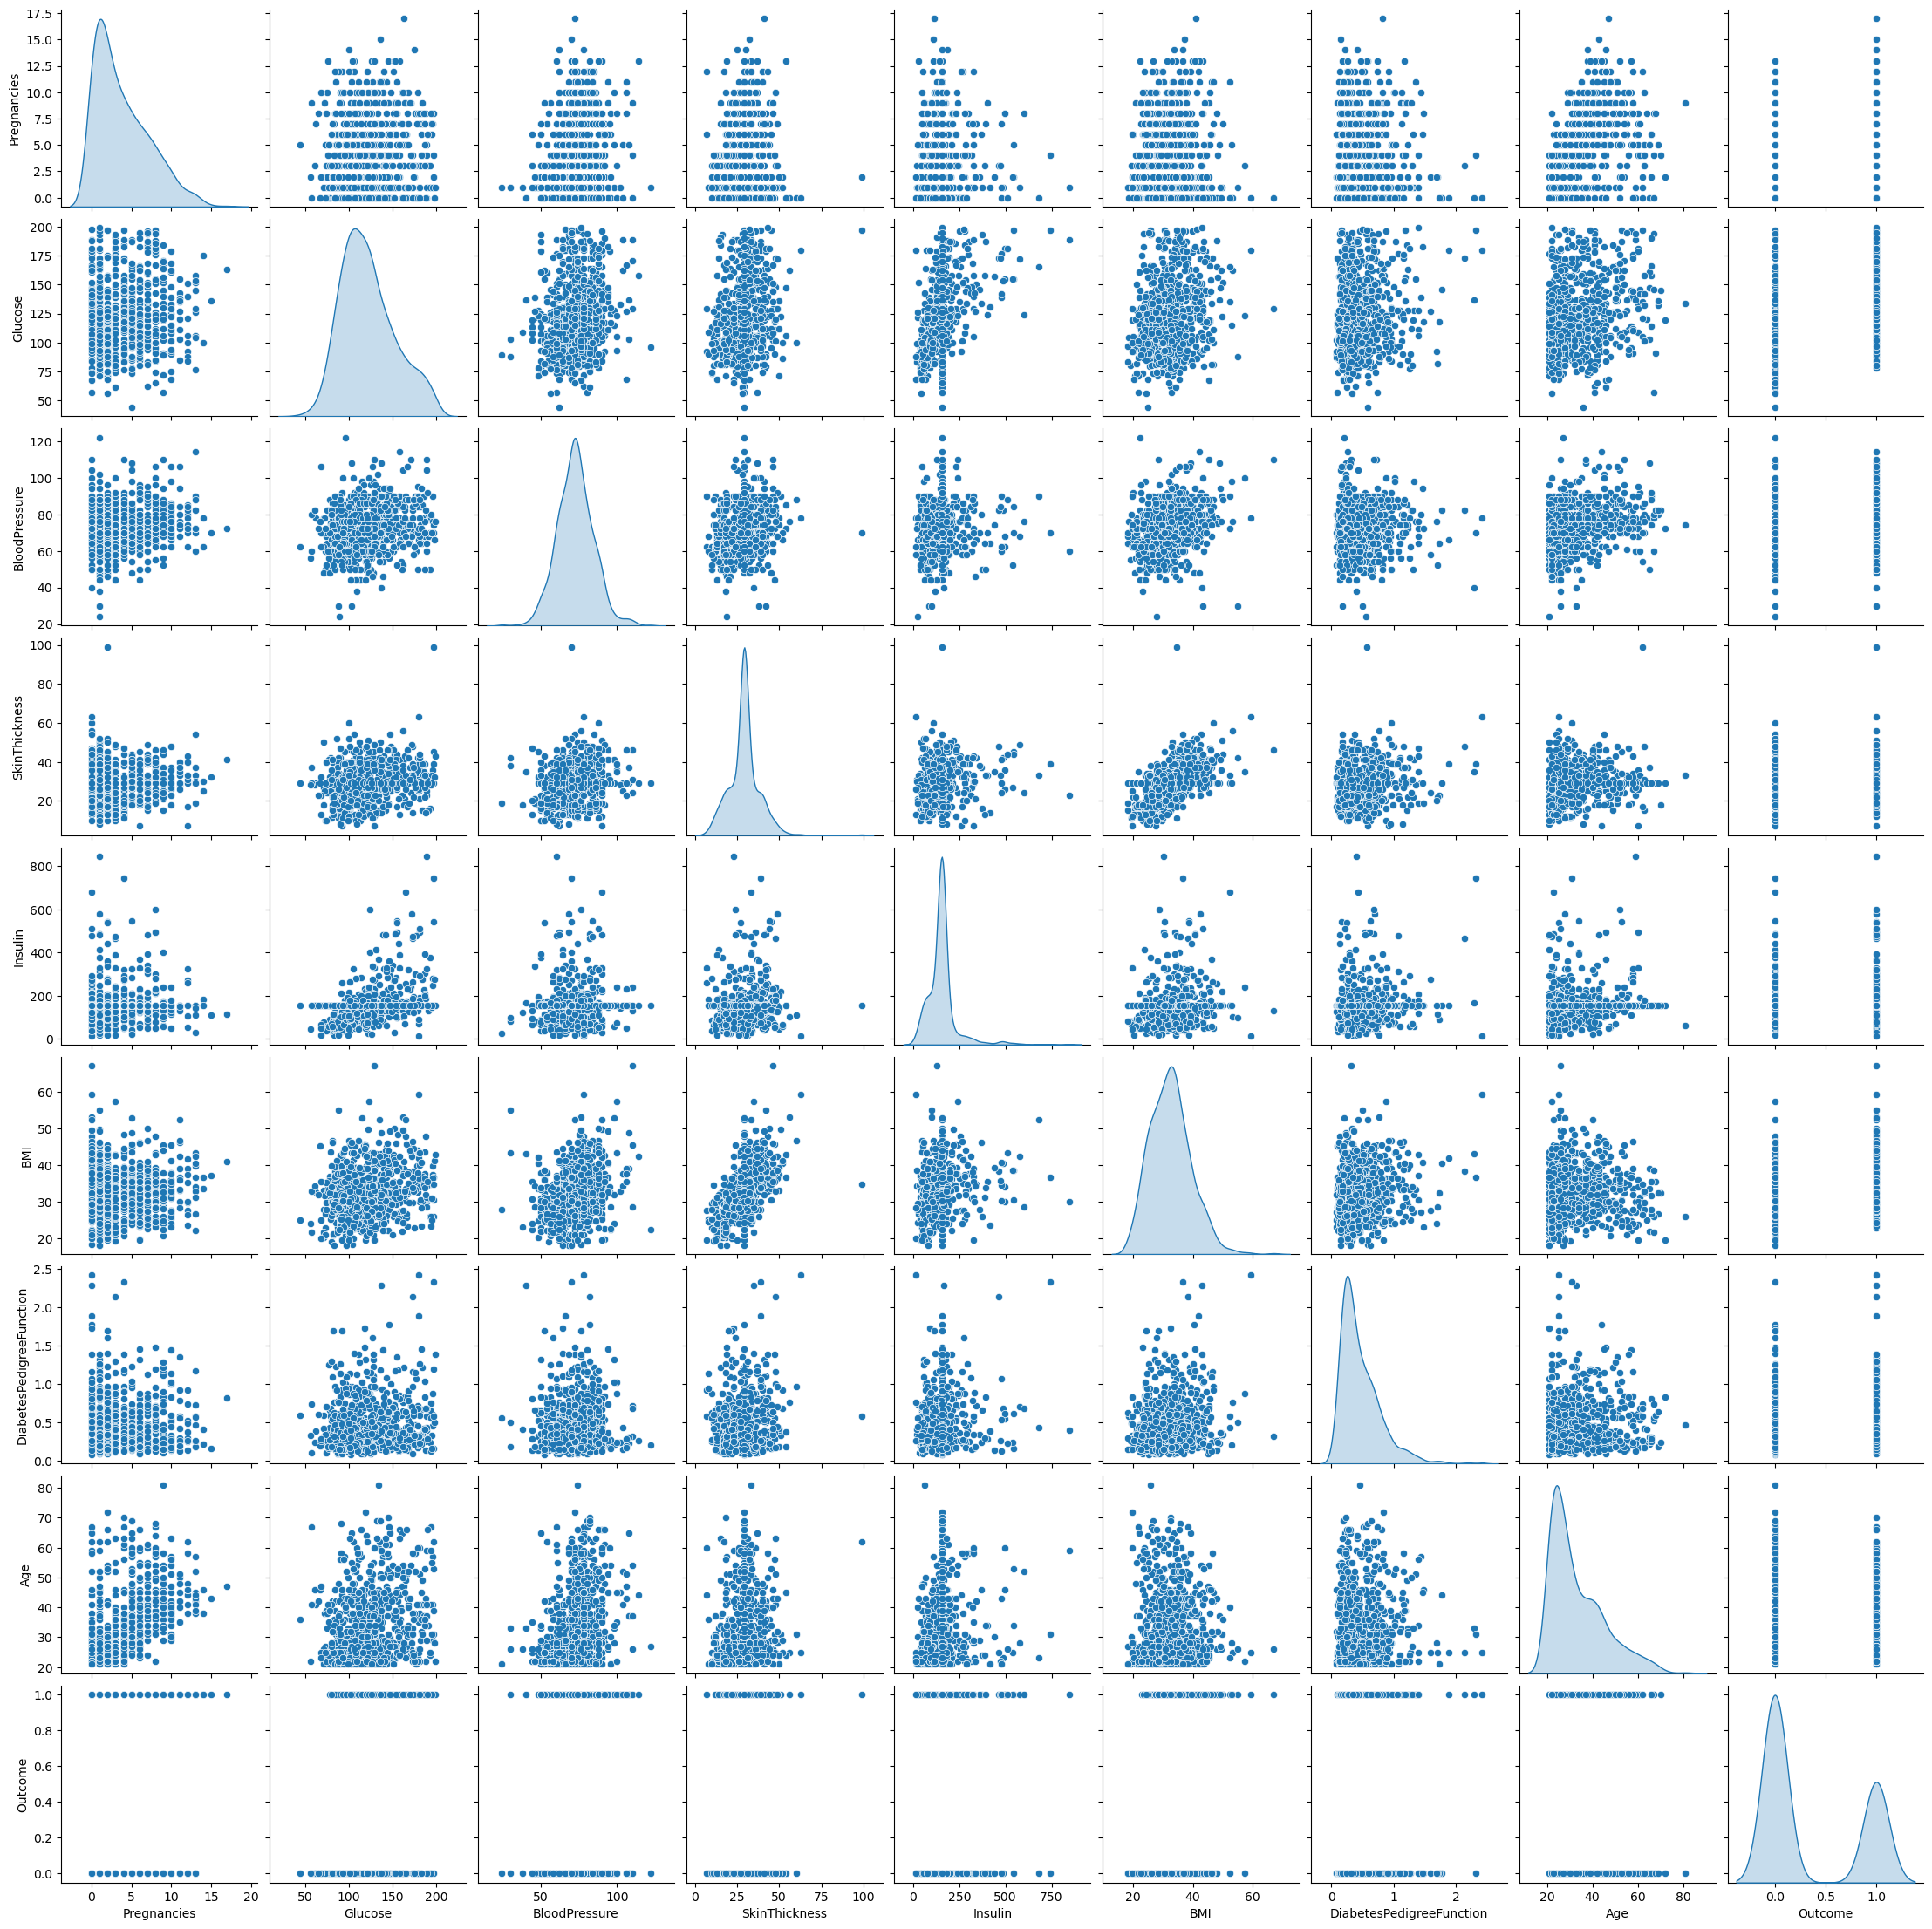

In [34]:
plt.figure(figsize=(7,5))
sns.pairplot(data,diag_kind = 'kde')

In [35]:
data.skew()

Pregnancies                 0.901674
Glucose                     0.532719
BloodPressure               0.137305
SkinThickness               0.822173
Insulin                     3.019084
BMI                         0.598253
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

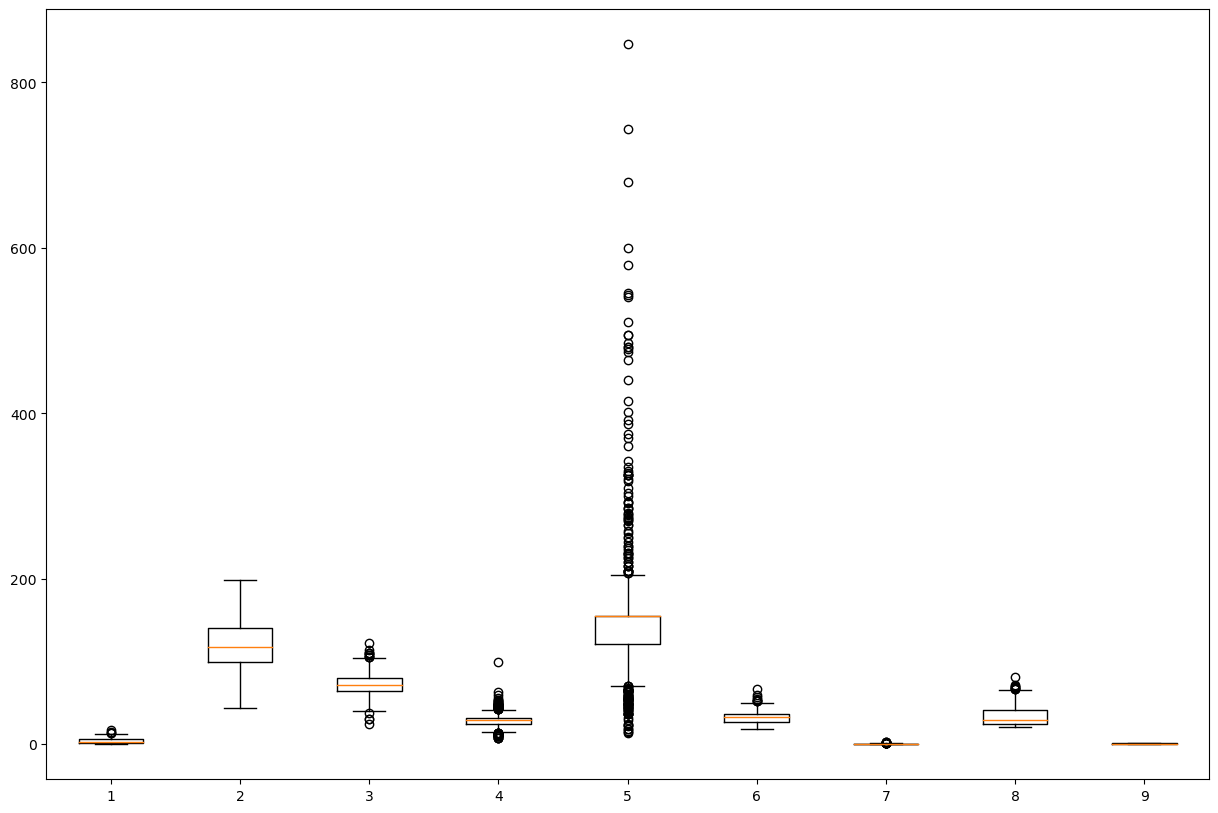

In [36]:
plt.figure(figsize=(15,10))
plt.boxplot(data)
plt.show()

## Note: from the pairplot above we can see that there 
## is some skewness in the data  also we can observe that
## there are too many outliers in  insulin column we need 
## to  treat these skewness and outliers in the data. 

In [37]:
# Using Log transformation to treat skewness in the data.
data['Glucose']=np.log(data['Glucose'])
data['BloodPressure']=np.log(data['BloodPressure'])
data['Insulin']=np.log(data['Insulin'])
data['BMI']=np.log(data['BMI'])
data['Age']=np.log(data['Age'])
data['DiabetesPedigreeFunction']=np.log(data['DiabetesPedigreeFunction'])

In [38]:
data.skew()

Pregnancies                 0.901674
Glucose                    -0.067774
BloodPressure              -0.824957
SkinThickness               0.822173
Insulin                    -0.789695
BMI                        -0.057081
DiabetesPedigreeFunction    0.114178
Age                         0.601746
Outcome                     0.635017
dtype: float64

### IMP NOTE: we cannot apply log transformation on pregnancies and outcome
### column as for the records of '0' in the columns, log of those records is infinite.

<Figure size 1500x1000 with 0 Axes>

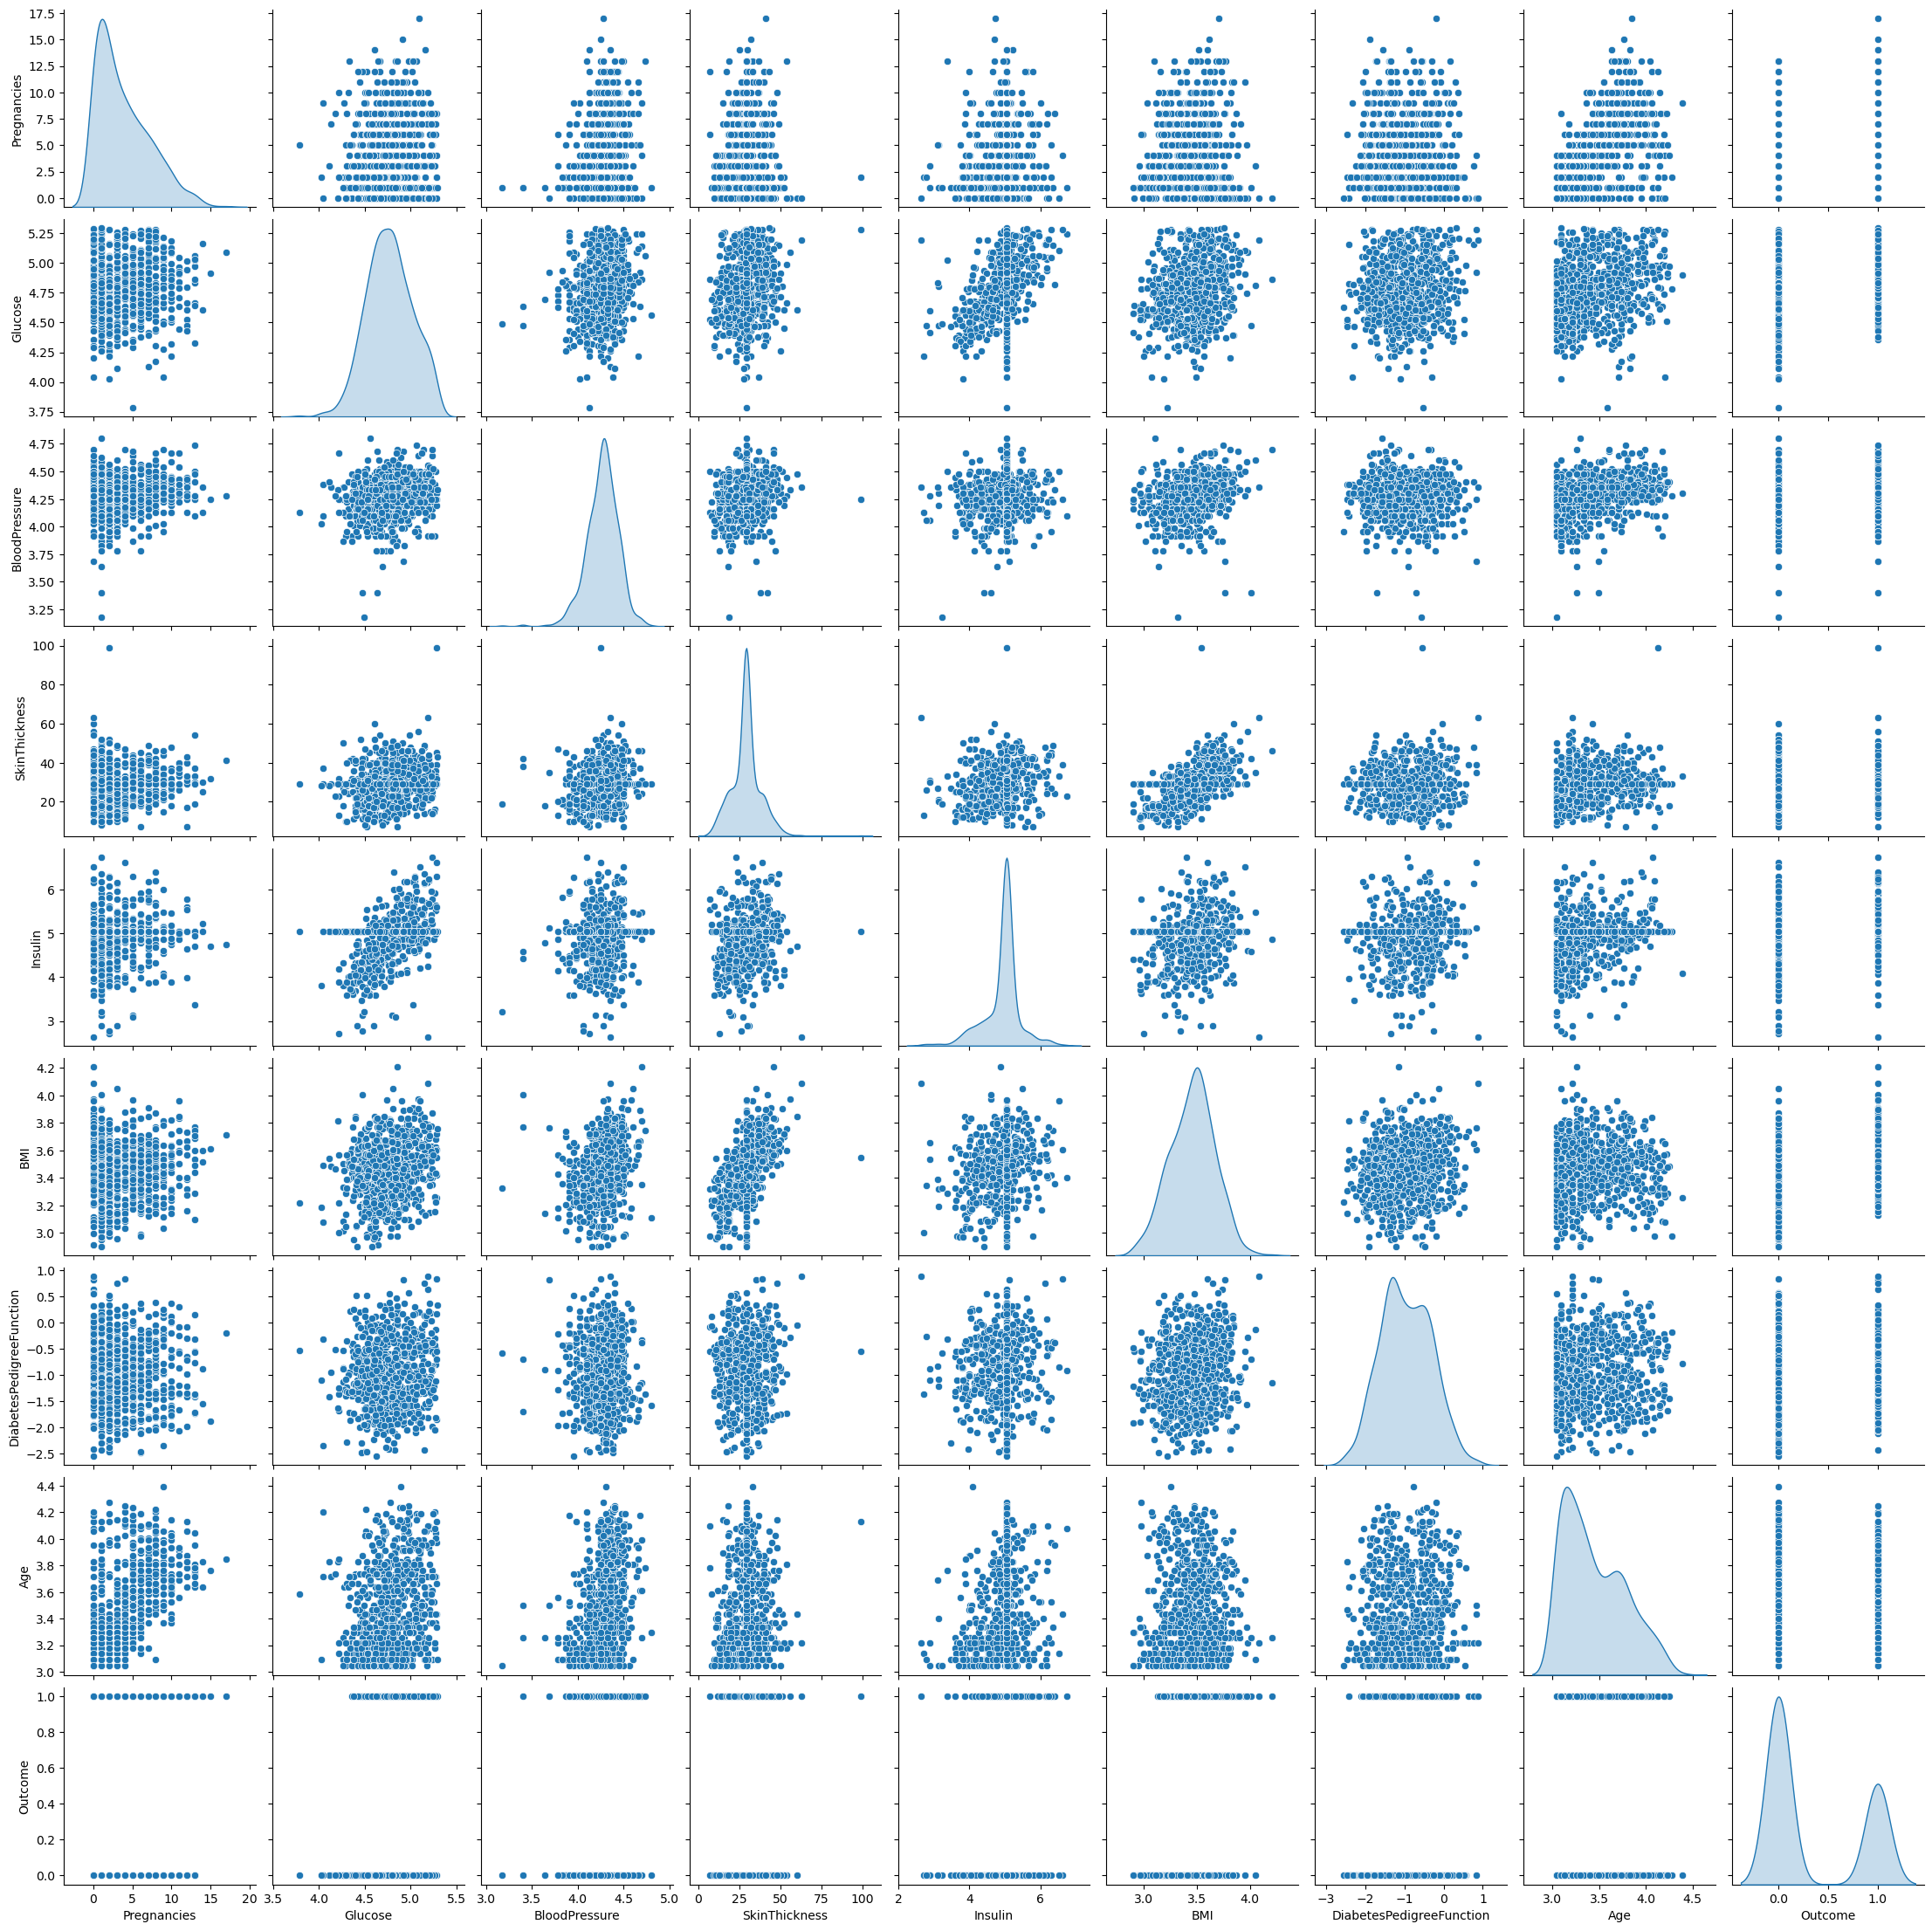

In [39]:
plt.figure(figsize=(15,10))
sns.pairplot(data, diag_kind ='kde')
plt.show()

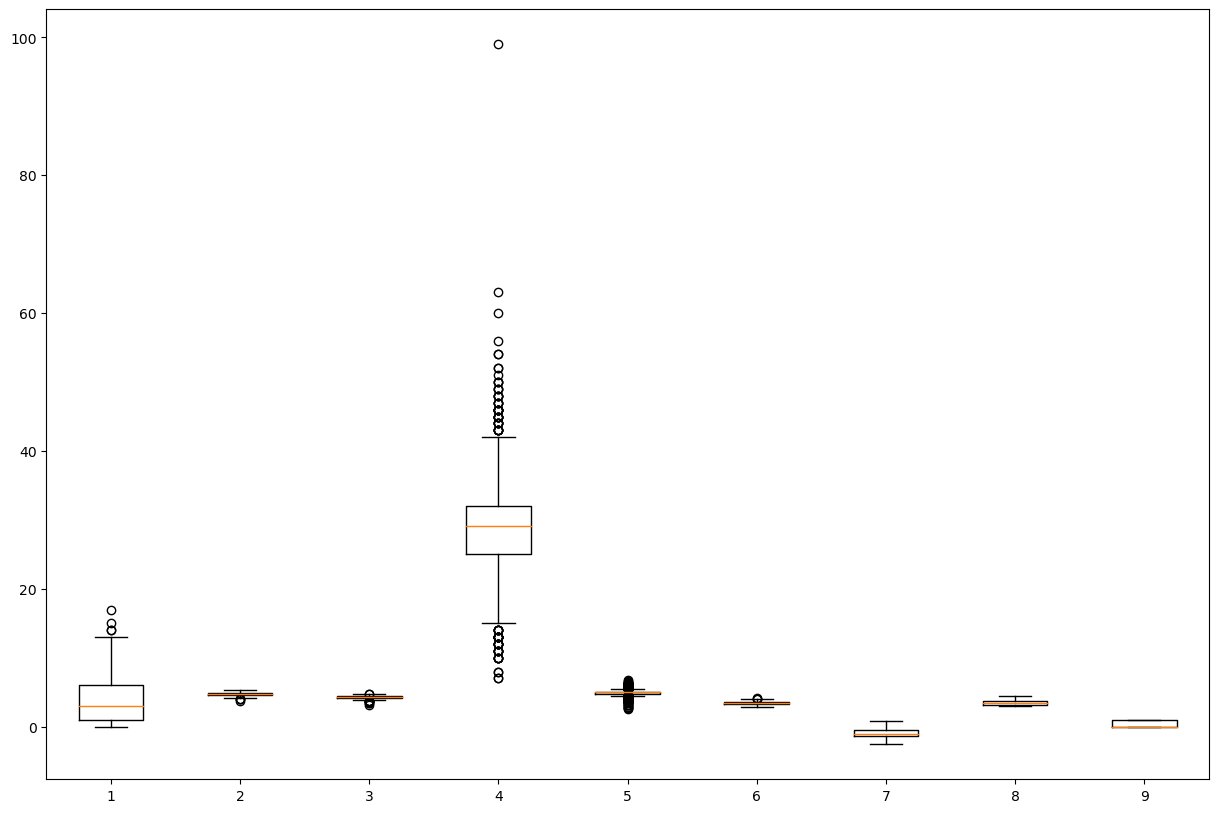

In [40]:
plt.figure(figsize=(15,10))
plt.boxplot(data)
plt.show()

## Hence From the above pair plot and box plot we can observe
## that the maximum skewness and outliers have been treated. 

<AxesSubplot:>

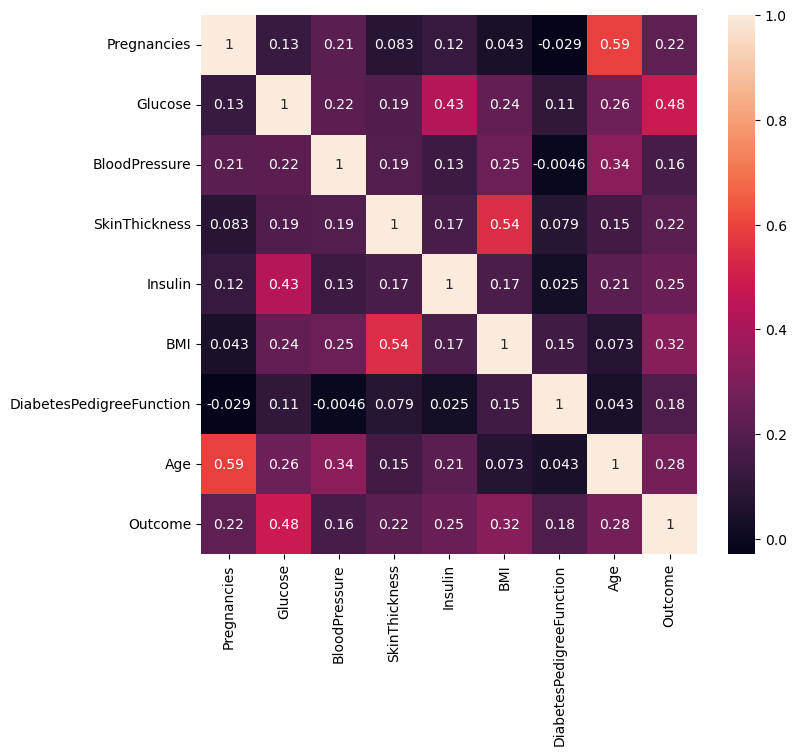

In [41]:
plt.figure(figsize=(8,7))
sns.heatmap(data.corr(), annot =True,)

## Note: we need to perform scaling on  the data as there are 
## diifferent units for different features.

In [42]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,4.997212,4.276666,35.00000,5.046956,3.514526,-0.466809,3.912023,1
1,1,4.442651,4.189655,29.00000,5.046956,3.280911,-1.046969,3.433987,0
2,8,5.209486,4.158883,29.15342,5.046956,3.148453,-0.397497,3.465736,1
3,1,4.488636,4.189655,23.00000,4.543295,3.335770,-1.789761,3.044522,0
4,0,4.919981,3.688879,35.00000,5.123964,3.763523,0.827678,3.496508,1


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
data_to_scale = data.copy()
data_to_scale = pd.DataFrame(data_to_scale)


In [45]:
scaled_data = scaler.fit_transform(data_to_scale.drop(['Outcome'], axis =1))
scaled_data = pd.DataFrame(scaled_data)
X = scaled_data.rename(columns = {0:'Pregnancies',1:'Glucose',2:'BloodPressure',3:'SkinThickness',
                             4:'Insulin',5:'BMI',6:'DiabetesPedigreeFunction',7:'Age'})
y = data_to_scale['Outcome']

In [46]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.908375,0.051655,6.655021e-01,0.238454,0.269100,0.765848,1.436379
1,-0.844885,-1.313822,-0.446550,-1.746338e-02,0.238454,-0.839684,-0.135159,-0.045939
2,1.233880,1.758983,-0.622741,8.087936e-16,0.238454,-1.468356,0.873492,0.052509
3,-0.844885,-1.129553,-0.446550,-7.004289e-01,-0.741396,-0.579315,-1.288739,-1.253612
4,-1.141852,0.598899,-3.313863,6.655021e-01,0.388270,1.450890,2.776227,0.147927


In [47]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### NOTE: from the above data we can see that our data has been scaled. It does not 
### make sense to scale the Outcome column as it is our target variable which is 
### categorical in nature.

# 2) SPLITTING DATA:

In [48]:
X.shape

(768, 8)

In [49]:
y.shape

(768,)

In [50]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.20,random_state =20, stratify = y)

In [51]:
X_train.shape

(614, 8)

In [52]:
y_train.shape

(614,)

## Note: all required data cleaning,EDA,Scaling,transformations
## and splitting of the data is done.

# 3) DATA MODELLING: 
## NOW WE WILL SEE THE RESULTS BY BUILDING DIFFERENT CLASSIFICATION MODELS AND COMPARE THEIR RESULTS WITH KNN.

# MODEL 1 - KNN CLASSIFIER.

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
#Note1: As we know that for different values of 'K' the accuracy will vary hence we may require
# 'K' such that we have a good accuracy.

#Note2: we can check the accuracy for different values of 'K' seperately but this can be a 
#little time consuming, instead we can use for-loop statement to find the different value  
#of 'K' with its accuracy. 

In [54]:
for k in range(25):
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights ='uniform', algorithm ='auto')
    knn.fit(X_train,y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    print("When the value of K is",k_value, '\n The accuracy for train data is', 
          accuracy_score(y_train,y_pred_train)*100,'%','\n and for test data is',
          accuracy_score(y_test,y_pred_test)*100,'%')

When the value of K is 1 
 The accuracy for train data is 100.0 % 
 and for test data is 66.88311688311688 %
When the value of K is 2 
 The accuracy for train data is 84.03908794788273 % 
 and for test data is 71.42857142857143 %
When the value of K is 3 
 The accuracy for train data is 85.34201954397395 % 
 and for test data is 75.32467532467533 %
When the value of K is 4 
 The accuracy for train data is 81.59609120521174 % 
 and for test data is 77.92207792207793 %
When the value of K is 5 
 The accuracy for train data is 81.75895765472313 % 
 and for test data is 77.27272727272727 %
When the value of K is 6 
 The accuracy for train data is 79.80456026058633 % 
 and for test data is 79.87012987012987 %
When the value of K is 7 
 The accuracy for train data is 80.29315960912052 % 
 and for test data is 78.57142857142857 %
When the value of K is 8 
 The accuracy for train data is 78.50162866449512 % 
 and for test data is 79.87012987012987 %
When the value of K is 9 
 The accuracy for 

## NOTE: 
### From above we can see that for different values of K, 
### there are different values of accuracy for train and test data
### some have good accuracy but the standard deviation between 
### train and test data is more which can lead to underfitting / overfitting.
### hence the best results are availabe for
### K-VALUE = 6, WITH ACCURACY OF 79.80% AND  79.87%
### FOR TRAIN DATA AND TEST DATA RESPECTIVELY TO BECOME A STABLE MODEL.

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
Conf_matrix_train = pd.crosstab(y_train, y_pred_train)
Conf_matrix_train

col_0,0,1
Outcome,,
0,342,58
1,82,132


In [56]:
Conf_matrix_test = pd.crosstab(y_test, y_pred_test)
Conf_matrix_test

col_0,0,1
Outcome,,
0,93,7
1,24,30


In [57]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       100
           1       0.81      0.56      0.66        54

    accuracy                           0.80       154
   macro avg       0.80      0.74      0.76       154
weighted avg       0.80      0.80      0.79       154



In [58]:
#GOOD TO KNOW INFO:
#specificity or negative f1score  = metrics.f1_score(y_test, y_pred_test, pos_label=0)
#specificity or positive f1score = metrics.f1_score(y_test, y_pred_test, pos_label=1)

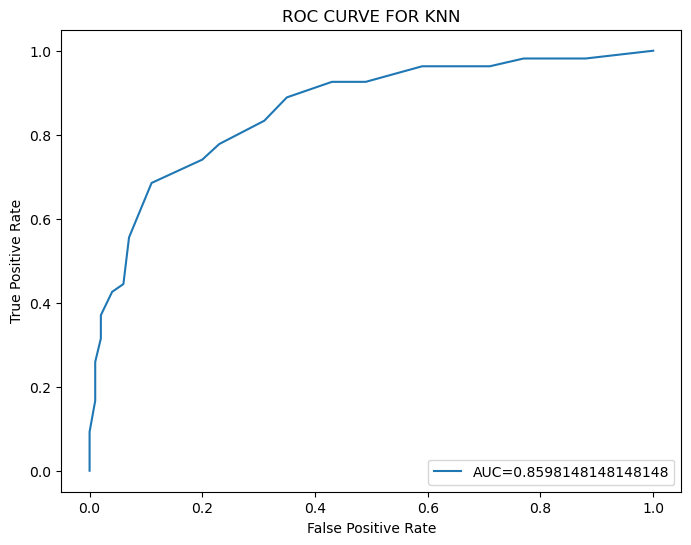

In [59]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title("ROC CURVE FOR KNN")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## NOTE: 
      From the classification report 
      sensitivity-93%
      specificity-56%  
      AUC - 0.8598

# MODEL 2 - RANDOM FOREST CLASSIFIER.

In [60]:
from sklearn.ensemble import RandomForestClassifier

## To check the accuracy for differnt value of n_estimators.

In [61]:
for n in range(75,100):
    estimators = n+1
    rfc = RandomForestClassifier(n_estimators=estimators)
    rfc.fit(X_train,y_train)
    y_train_pred_rfc = rfc.predict(X_train)
    y_test_pred_rfc = rfc.predict(X_test)
    print("When the value of estimators is",n, '\n The accuracy for train data is', 
          accuracy_score(y_train,y_train_pred_rfc)*100,'%','\n and for test data is',
          accuracy_score(y_test,y_test_pred_rfc)*100,'%')
    
        

    

When the value of estimators is 75 
 The accuracy for train data is 100.0 % 
 and for test data is 78.57142857142857 %
When the value of estimators is 76 
 The accuracy for train data is 100.0 % 
 and for test data is 77.27272727272727 %
When the value of estimators is 77 
 The accuracy for train data is 100.0 % 
 and for test data is 78.57142857142857 %
When the value of estimators is 78 
 The accuracy for train data is 100.0 % 
 and for test data is 79.22077922077922 %
When the value of estimators is 79 
 The accuracy for train data is 100.0 % 
 and for test data is 78.57142857142857 %
When the value of estimators is 80 
 The accuracy for train data is 100.0 % 
 and for test data is 78.57142857142857 %
When the value of estimators is 81 
 The accuracy for train data is 100.0 % 
 and for test data is 77.92207792207793 %
When the value of estimators is 82 
 The accuracy for train data is 100.0 % 
 and for test data is 77.92207792207793 %
When the value of estimators is 83 
 The accurac

## we can observe that the model has performed really good
## on train data but have poorely performed on test data.
## hence this is a case of  OVERFITTING.
## the potential cause of Overfitting 
### may be as follows:
* Number of neighbors is not chosen properly.
* The model is not able to fit the data well.
* The size of the training dataset used in not enough.
* High bias and Low variance. 
* Noise in the data.

In [62]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix_rfc_train = pd.crosstab(y_train,y_train_pred_rfc)
conf_matrix_rfc_train

col_0,0,1
Outcome,,
0,400,0
1,0,214


In [63]:
conf_matrix_rfc_test = pd.crosstab(y_test,y_test_pred_rfc)
conf_matrix_rfc_test

col_0,0,1
Outcome,,
0,90,10
1,23,31


## From the confusion matrix on train and test data we can clearly see
## that when the train data is given to the model, model is trying to overfit 
## the data with no False negatives and false positives.
## But when the test data is introduced to the model it captures
## False positive and False negatives.
## The potential cause of overfitting of this model are: 
* The model is not the best choice for this data.
* not enough number of features / sufficient amount of data 
  so that the model can train better.

In [64]:
print(classification_report(y_test,y_test_pred_rfc))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       100
           1       0.76      0.57      0.65        54

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



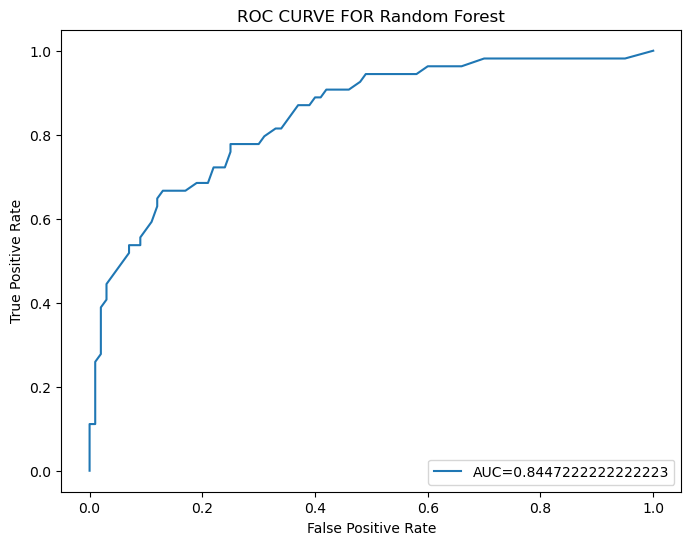

In [65]:
y_pred_proba_rfc = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_rfc)
auc = metrics.roc_auc_score(y_test, y_pred_proba_rfc)

#create ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title("ROC CURVE FOR Random Forest")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## NOTE: 
      From the classification report 
      sensitivity-91%
      specificity-59%  
      AUC - 0.8446

# MODEL 3 - DECISION TREE CLASSIFIER

In [67]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini')
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [68]:
y_train_pred_DT = DT.predict(X_train)
y_test_pred_DT = DT.predict(X_test)

In [69]:
print("the accuracy of train data is",accuracy_score(y_train,y_train_pred_DT))

the accuracy of train data is 1.0


In [70]:
print("the accuracy of test data is",accuracy_score(y_test,y_test_pred_DT))

the accuracy of test data is 0.7467532467532467


In [71]:
conf_matrix_DT_train = pd.crosstab(y_train,y_train_pred_DT)
conf_matrix_DT_train

col_0,0,1
Outcome,,
0,400,0
1,0,214


In [72]:
conf_matrix_DT_test = pd.crosstab(y_test,y_test_pred_DT)
conf_matrix_DT_test

col_0,0,1
Outcome,,
0,82,18
1,21,33


## From the confusion matrix on train and test data we can clearly see
## that when the train data is given to the model, model is trying to overfit 
## the data with no False negatives and false positives.
## But when the test data is introduced to the model it captures
## False positive and False negatives.
## The potential cause of overfitting of this model are: 
* The model is not the best choice for this data.
* not enough number of features / sufficient amount of data 
  so that the model can train better.

In [73]:
print(classification_report(y_test,y_test_pred_DT))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.65      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154



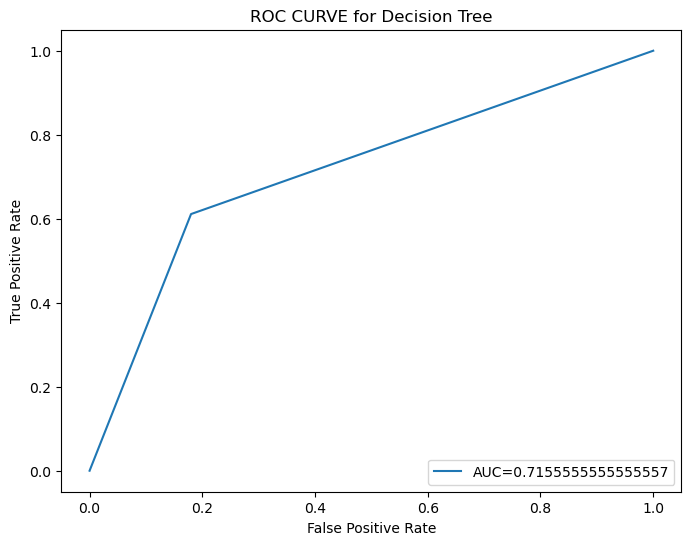

In [74]:
y_pred_proba_DT = DT.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_DT)
auc = metrics.roc_auc_score(y_test, y_pred_proba_DT)

#create ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title("ROC CURVE for Decision Tree")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## NOTE: 
      From the classification report 
      sensitivity-84%
      specificity-59%  
      AUC - 0.6912

# Model 4 - XGBOOST Classifer.

In [75]:
from xgboost import XGBClassifier

xgb = XGBClassifier(gamma=0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [76]:
y_train_pred_xgb = DT.predict(X_train)
y_test_pred_xgb = DT.predict(X_test)

In [77]:
print("the accuracy of train data is",accuracy_score(y_train,y_train_pred_xgb))

the accuracy of train data is 1.0


In [78]:
print("the accuracy of test data is",accuracy_score(y_test,y_test_pred_xgb))

the accuracy of test data is 0.7467532467532467


In [79]:
conf_matrix_xgb_train = pd.crosstab(y_train,y_train_pred_xgb)
conf_matrix_xgb_train

col_0,0,1
Outcome,,
0,400,0
1,0,214


In [80]:
conf_matrix_xgb_test = pd.crosstab(y_test,y_test_pred_xgb)
conf_matrix_xgb_test

col_0,0,1
Outcome,,
0,82,18
1,21,33


## From the confusion matrix on train and test data we can clearly see
## that when the train data is given to the model, model is trying to overfit 
## the data with no False negatives and false positives.
## But when the test data is introduced to the model it captures
## False positive and False negatives.
## The potential cause of overfitting of this model are: 
* The model is not the best choice for this data.
* not enough number of features / sufficient amount of data 
  so that the model can train better.

In [81]:
print(classification_report(y_test,y_test_pred_xgb))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.65      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154



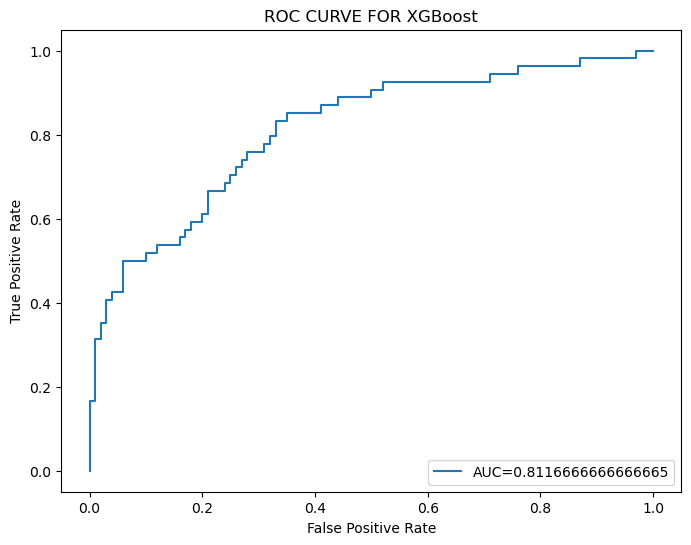

In [82]:
y_pred_proba_xgb = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_xgb)
auc = metrics.roc_auc_score(y_test, y_pred_proba_xgb)

#create ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title("ROC CURVE FOR XGBoost")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## NOTE: 
      From the classification report 
      sensitivity-79%
      specificity-59%  
      AUC - 0.8116

# The Conclusion from Model Building:
### The KNN Classifier is the best model for this prediction since 
### it has an accuracy score of 0.7987 and with AUC of 0.8598.
* (AUC closer to 1 the better it is.)
### also does not have any overfitting / underfitting for 'n_neighbors'  = 6.
### hence KNN is the stable model for our problem statement

# 4) FINALIZING THE MODEL

## So we know that KNN has the good results for
## being the stable model with 'n_neighbors' = 6 
## we will finalize our model.

In [83]:
knn_final_model = KNeighborsClassifier(n_neighbors = 6, weights ='uniform', algorithm ='auto')
knn_final_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [84]:
y_pred_final = knn_final_model.predict(X_test)

In [85]:
accuracy_score(y_test,y_pred_final)

0.7987012987012987

# 5) LOADING THE MODEL

### Lets us use the dump function to save the model using pickle first.
### and Then we will be loading the saved model.


In [86]:
import pickle
pickle_out=open("Finalized_model.pkl","wb")
pickle.dump(knn_final_model,pickle_out)
pickle_out.close()

### After loading that model we will use this to make predictions.
### knn_final_model.predict(X_test)

In [111]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,4.615121,4.330733,48.00000,5.192957,3.493473,-1.766092,4.143135,0
764,2,4.804021,4.248495,27.00000,5.046956,3.605498,-1.078810,3.295837,0
765,5,4.795791,4.276666,23.00000,4.718499,3.265759,-1.406497,3.401197,0
766,1,4.836282,4.094345,29.15342,5.046956,3.404525,-1.052683,3.850148,1
767,1,4.532599,4.248495,31.00000,5.046956,3.414443,-1.155183,3.135494,0


In [112]:
knn_final_model.predict([[10,4.615121,4.330733,48.00000,5.192957,3.493473,-1.766092,4.143135]]) #763rd Patient inputs

array([0], dtype=int64)

* As we can see when the inputs of 763rd Patient 
is provided it predicts the same output as acutal value.

In [113]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,4.997212,4.276666,35.00000,5.046956,3.514526,-0.466809,3.912023,1
1,1,4.442651,4.189655,29.00000,5.046956,3.280911,-1.046969,3.433987,0
2,8,5.209486,4.158883,29.15342,5.046956,3.148453,-0.397497,3.465736,1
3,1,4.488636,4.189655,23.00000,4.543295,3.335770,-1.789761,3.044522,0
4,0,4.919981,3.688879,35.00000,5.123964,3.763523,0.827678,3.496508,1


In [114]:
knn_final_model.predict([[0,4.919981,3.688879,35.00000,5.123964,3.763523,0.827678,3.496508]]) #4th patient inputs

array([1], dtype=int64)

* As we can see when the inputs of 4th Patient 
is provided it predicts the same output as acutal value.

# RESULT INTERPRETATION:
### NIDDK research creates knowledge about and treatments for diseases that are among the most chronic, 
### costly, and consequential for patients, their families, and the Nation.
    
### Diabetes affects an estimated 37.3 million people in the United States and is the eighth leading cause of death.
### Diabetes is also associated with serious complications, such as heart disease and stroke, blindness, kidney failures.
    
### This study on diabetes dataset may help NIDDK as follows:
* NIDDK can start diabetes awareness capmpaigns to see what percentage of people 
  are suffering from Diabetes with different age group and medical predictors.
* Accordingly they can analyze which regions are affeted most and their lifestyle.
* Running campaigns can also help to arrange checkups and  maintaining the lifestyle in a proper way 
  to control diabetes. 
* Suggest Do's and Dont's according to the patients medical variables example: insulin, glucose
  BMI, Age and more.
        